<a href="https://colab.research.google.com/github/KunalDM1999/ML-LEARNINGS-/blob/main/assignement7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Common imports
import numpy as np
from pprint import pprint
from tempfile import mkdtemp
from shutil import rmtree

# to make this notebook's output stable across runs
np.random.seed(42)

#sklearn specific imports
# Dataset fetching
from sklearn.datasets import fetch_openml

# Feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Pipeline utility
from sklearn.pipeline import make_pipeline

# Classifiers: dummy, logistic regression (SGD and LogisticRegression)
# and least square classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier,RidgeClassifier, LogisticRegression,LogisticRegressionCV,RidgeClassifierCV

# Model selection
from sklearn.model_selection import cross_validate,RandomizedSearchCV,GridSearchCV,cross_val_predict
from sklearn.model_selection import learning_curve,train_test_split


# Evaluation metrics
from sklearn.metrics import log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc,roc_curve,roc_auc_score

# scipy
from scipy.stats import loguniform

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# global settings
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure',figsize=(8,6))

In [ ]:
# Ignore all warnings (convergence..) by sklearn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

The last training sample is of digit 6.


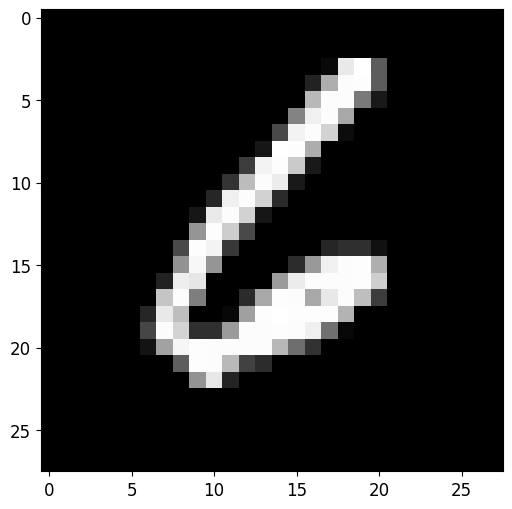

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml

X_pd,y_pd= fetch_openml('mnist_784',version=1,return_X_y=True)
# convert to numpy array
X = X_pd.to_numpy()
y = y_pd.to_numpy().astype(np.int32)
split_index = int(0.7 * len(X))

# Split the dataset
x_train, x_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Get the label of the last training sample
last_training_label = y_train[-1]

print(f"The last training sample is of digit {last_training_label}.")
plt.imshow(x_train[-1,:].reshape(28,28),cmap='gray')

In [ ]:
from sklearn.utils import shuffle
#train data
# get the index of dig6 and dig_9
dig_6_idx = np.where(y_train ==6)[0]
dig_9_idx = np.where(y_train ==9)[0]
index = np.concatenate((dig_6_idx,dig_9_idx),axis=0)
# get all samples from the index array
x_train_69 = x_train[index,:]
# create the label vector
y_train_69 = np.concatenate((np.ones(len(dig_6_idx)),np.zeros(len(dig_9_idx))))

from sklearn.utils import shuffle
x_train_69,y_train_69 = shuffle(x_train_69,y_train_69,random_state=1729)
#Test Data
# get the index of dig6 and dig_9
dig_6_idx = np.where(y_test ==6)[0]
dig_9_idx = np.where(y_test ==9)[0]
index = np.concatenate((dig_6_idx,dig_9_idx),axis=0)
# get all samples from the index array
x_test_69 = x_test[index,:]
# create the label vector
y_test_69 = np.concatenate((np.ones(len(dig_6_idx)),np.zeros(len(dig_9_idx))))

from sklearn.utils import shuffle
x_test_69,y_test_69 = shuffle(x_test_69,y_test_69,random_state=1729)
print('The sum of label vectors:',np.sum(y_train_69))
print('The sum of label vectors:',np.sum(y_test_69))
print('The sum of label vectors:',np.count_nonzero(y_train==6))

The sum of label vectors: 4855.0
The sum of label vectors: 2021.0
The sum of label vectors: 4855


In [ ]:

scaler = StandardScaler()
x_train_69Tf = scaler.fit_transform(x_train_69)
print('Mean of 0th sample:',np.mean(x_train_69Tf[0,:]))
print('Mean of 0th sample:',np.mean(x_train_69Tf[:,0]))
print('Std of the 0th sample:',np.std(x_train_69Tf[0,:]))
print('Std of the 0th sample:',np.std(x_train_69Tf[:,0]))

Mean of 0th sample: 0.08128379559427823
Mean of 0th sample: 0.0
Std of the 0th sample: 0.7358823226037738
Std of the 0th sample: 0.0


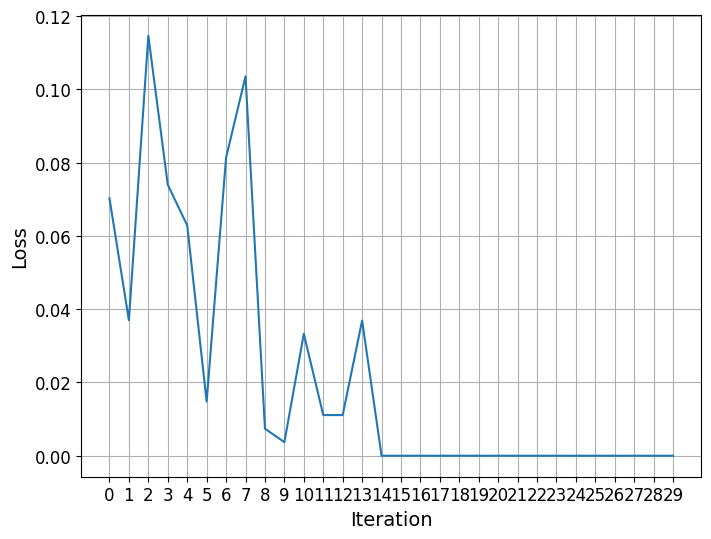

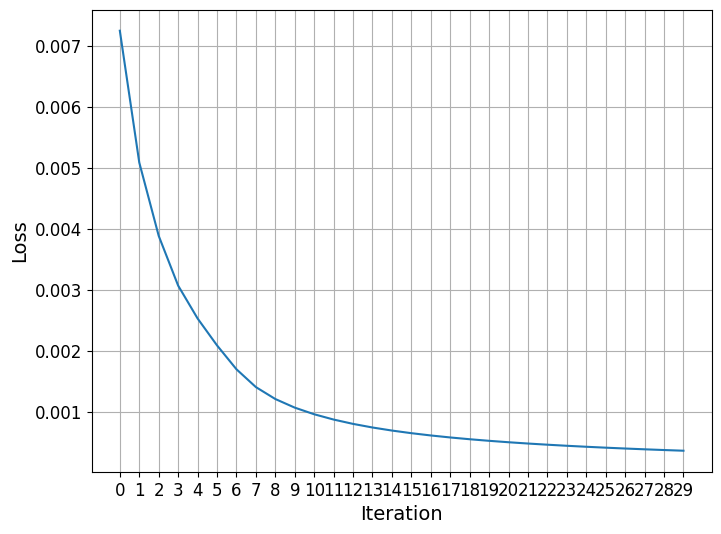

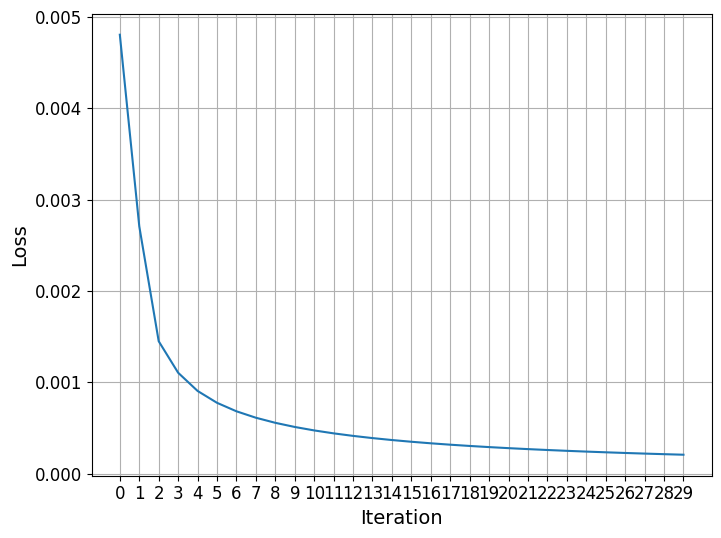

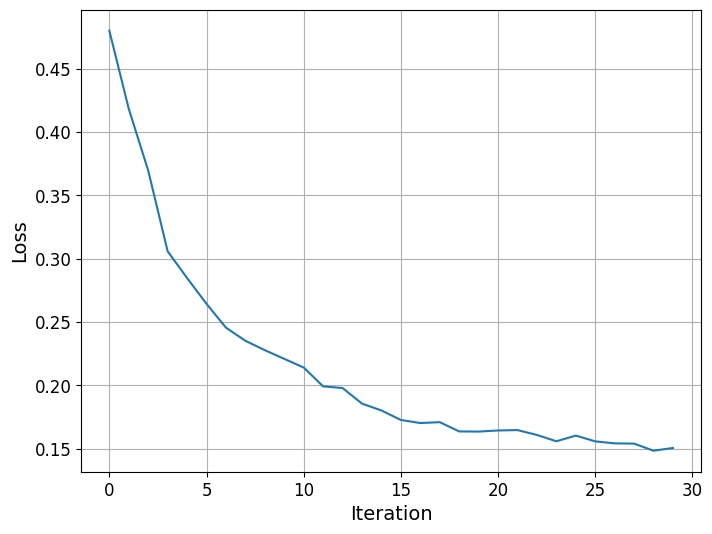

In [ ]:
estimator = SGDClassifier(loss='log_loss',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        eta0=0.01,
                        alpha=0,
                        learning_rate='constant',
                        random_state=10)
pipe_sgd_A= make_pipeline(estimator)
Loss=[]
iterations= 30
for i in range(iterations):
  pipe_sgd_A.fit(x_train_69,y_train_69)
  y_pred = pipe_sgd_A.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.xticks(ticks=np.arange(30),labels=np.arange(30))
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

estimator = SGDClassifier(loss='log_loss',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        eta0=0.000001,
                        alpha=0,
                        learning_rate='constant',
                        random_state=10)
pipe_sgd_B= make_pipeline(estimator)
Loss=[]
iterations= 30
for i in range(iterations):
  pipe_sgd_B.fit(x_train_69,y_train_69)
  y_pred = pipe_sgd_B.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.xticks(ticks=np.arange(30),labels=np.arange(30))
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

estimator = SGDClassifier(loss='log_loss',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        eta0=0.01,
                        alpha=0,
                        learning_rate='constant',
                        random_state=10)
pipe_sgd_C= make_pipeline(StandardScaler(),estimator)
Loss=[]
iterations= 30
for i in range(iterations):
  pipe_sgd_C.fit(x_train_69,y_train_69)
  y_pred = pipe_sgd_C.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
plt.xticks(ticks=np.arange(30),labels=np.arange(30))
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()
estimator = SGDClassifier(loss='log_loss',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        eta0=0.01,
                        alpha=0,
                        power_t =1.0,
                        learning_rate='invscaling',
                        random_state=10)
pipe_sgd_D= make_pipeline(estimator)
Loss=[]
iterations= 30
for i in range(iterations):
  pipe_sgd_D.fit(x_train_69,y_train_69)
  y_pred = pipe_sgd_D.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69,y_pred))
plt.figure()
plt.plot(np.arange(iterations),Loss)
# plt.xticks(ticks=np.arange(30),labels=np.arange(30))
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

False Positives (FP): 7


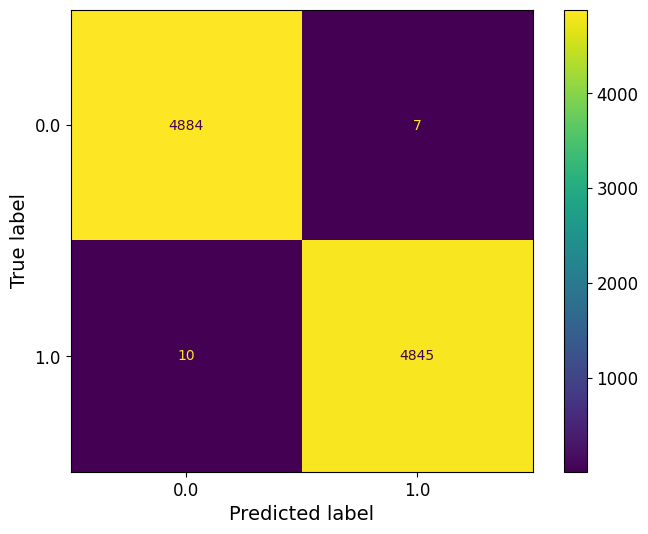

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
estimator = SGDClassifier(loss='log_loss',
                        penalty=None,
                        max_iter=10,
                        warm_start=True,
                        eta0=0.5,
                        alpha=0,
                        learning_rate='invscaling',
                        power_t = 0.5,
                        shuffle=True,
                        random_state=10)
pipe_sgd_E= make_pipeline(estimator)
pipe_sgd_E.fit(x_train_69, y_train_69)
y_hat_train_0 = pipe_sgd_E.predict(x_train_69)
conf_matrix = confusion_matrix(y_train_69,y_hat_train_0)

# Extract false positives (FP)
fp = conf_matrix[0, 1]
print(f"False Positives (FP): {fp}")
cm_display = ConfusionMatrixDisplay.from_predictions(y_train_69,y_hat_train_0,values_format='.5g') # it return matplotlin plot object


[2167 2407 3036 3368 4217 5556 6230]


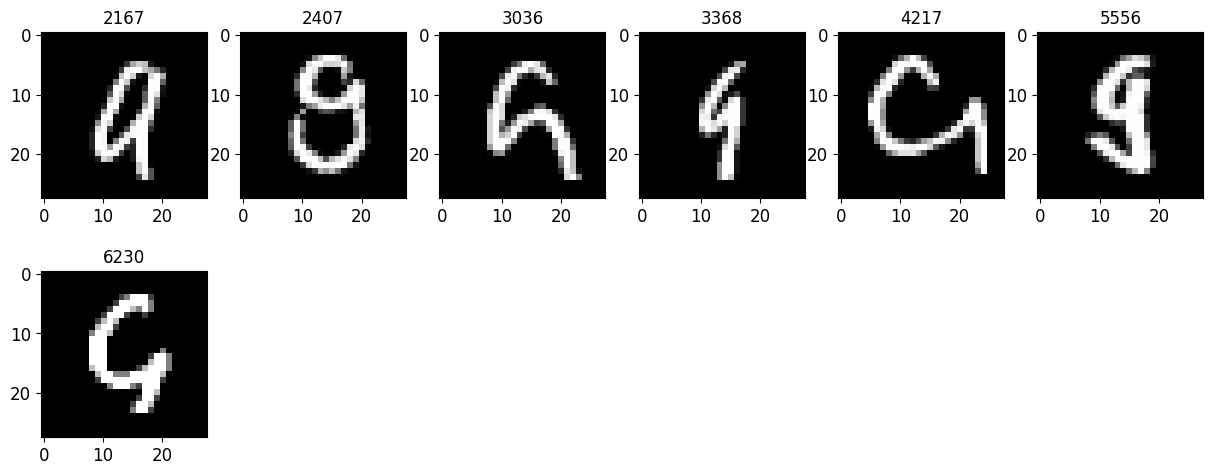

First index of FP samples: 2167


In [ ]:
# prompt: Display all the False Positive samples.Could a human recognize them correctly?. Get the index of all FP samples in ascending order. Enter the first index.

FP_index = np.where((y_hat_train_0==1) & (y_train_69==0))[0]
FP_index_sort = np.sort(FP_index)
print(FP_index_sort)
plt.figure(figsize=(15,15))
for index,image_index in enumerate(FP_index_sort):
  plt.subplot(5,6,index+1)
  plt.imshow(x_train_69[image_index,:].reshape(28,28),cmap='gray')
  plt.title(image_index)
plt.show()

# Enter the first index
print("First index of FP samples:", FP_index_sort[0])


In [ ]:
# prompt: rom sklearn.datasets import fetch_20newsgroups
# # Preprocessing
# from sklearn.feature_extraction.text import TfidfVectorize    Load the train subset of '20newsgroups' data.
#   Vectorize the data using TfidfVectorizer. Which of the following options represent the shape of the fitted and transformed dataset??

from sklearn.datasets import fetch_20newsgroups
# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the train subset of '20newsgroups' data
train_data = fetch_20newsgroups(subset='train')

# Vectorize the data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data.data)

# Print the shape of the fitted and transformed dataset
print(X_train.shape)  # Output: (11314, 130107)


(11314, 130107)


In [ ]:
# prompt: Split the training subset of fetch_20newsgroups data into train and validation sets using train_test_split with test_size = 0.3 and random_state = 0.
# Use MultinomialNB to train the model.
# Compute score on validation set.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomiaLNB
# Split the training data into train and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, train_data.target, test_size=0.3, random_state=0
)

# Train a Multinomial Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train_split, y_train_split)

# Compute the score on the validation set
score = clf.score(X_val, y_val)
print("Validation set score:", score)


Validation set score: 0.8427098674521355
